# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Faizal Ilyas Syah Putra
- **Email:** faizal.ily2003@mail.ugm.ac.id
- **ID Dicoding:** faizalilyas

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berubah sepanjang hari berdasarkan jam?
2. Bagaimana perkembangan penggunaan sistem peminjaman sepeda selama dua tahun terakhir?
3. Apakah ada perbedaan pola peminjaman sepeda antara hari-hari kerja dan akhir pekan?
4. Pada musim apa tingkat peminjaman sepeda mencapai puncaknya?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Faizalilyas/DataAnalisDicoding-/a950b60fa81f88ace32a69363e926d9423eec64d/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Faizalilyas/DataAnalisDicoding-/a950b60fa81f88ace32a69363e926d9423eec64d/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assesing Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Memastikan data tidak ada yang missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari assesing ini didapatkan hasil bahwa data day_df:
1. Terdapat kesalahan tipe data untuk kolom dteday
2. Beberapa kolom yang memuat kategori berdasarkan panduan pada Readme.txt masih salah tipe datanya
3. Beberapa nama kolom masih dituliskan singkatannya, sehingga tidak semua orang dapat memahami
4. Nilai numerik temperature, atemp, humidity, dan windspeed dalam bentuk normalisasi bukan nilai aslinya

Assesing Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
#Memastikan data tidak ada yang missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari assesing ini didapatkan hasil bahwa data hour_df:
Dari assesing ini didapatkan hasil bahwa data day_df:
1. Terdapat kesalahan tipe data untuk kolom dteday
2. Beberapa kolom yang memuat kategori berdasarkan panduan pada Readme.txt masih salah tipe datanya
3. Beberapa nama kolom masih dituliskan singkatannya, sehingga tidak semua orang dapat memahami

### Cleaning Data

Cleaning Data day_df

In [10]:
#Mengubah tipe data kolom dteday menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
#Mengubah tipe data beberapa tabel agar sesuai pada panduan Readme.txt
kolom = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in kolom:
    day_df[column] =  day_df[column].astype("category")
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

In [12]:
#Mengubah nama kolom agar lebih mudah dibaca
day_df.rename(columns={
    'dteday' : 'date',
    'yr':'year',
    'mnth':'month',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt':'count_cr',
    'hum':'humidity',
    'weathersit':'weather_situation'},
              inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    int64         
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    int64         
 8   weather_situation  731 non-null    category      
 9   temperature        731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [13]:
#Menjabarkan isi data bertipe kategori agar lebih mudah dipahami

# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Konversi weekdays menjadi: 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday
day_df.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi workingdays menjadi: 0:No 1:Yes
day_df.workingday.replace((0,1),('No', 'Yes'), inplace=True)


In [14]:
#Mengembalikan nilai numerik temperature, atemp, humidity, dan windspeed ke nilai asli
day_df['temperature'] = day_df['temperature']*41
day_df['atemp'] = day_df['atemp']*50
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

In [15]:
#Pada data set kolom instant hanya sebagai index, maka kolom tersebut dapat di drop
day_df = day_df.drop("instant", axis=1)

In [16]:
#Berikut adalah tampilan data set day_df setelah dilakukan cleansing:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,atemp,humidity,windspeed,casual,registered,count_cr
0,2011-01-01,Spring,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Cleansing data hour_df

In [17]:
#Mengubah tipe data kolom dteday menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
#Mengubah tipe data beberapa tabel agar sesuai pada panduan Readme.txt
klm = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for clmn in klm:
    hour_df[column] =  hour_df[column].astype("category")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
#Mengubah nama kolom agar lebih mudah dibaca
hour_df.rename(columns={
    'dteday' : 'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt':'count_cr',
    'weathersit':'weather_situation'},
              inplace=True)

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_situation  17379 non-null  category      
 10  temperature        17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [21]:
#Menjabarkan isi data bertipe kategori agar lebih mudah dipahami

# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Konversi weekdays menjadi: 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday
hour_df.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi workingdays menjadi: 0:No 1:Yes
hour_df.workingday.replace((0,1),('No', 'Yes'), inplace=True)

In [22]:
#Mengembalikan nilai numerik temperature, atemp, humidity, dan windspeed ke nilai asli
hour_df['temperature'] = hour_df['temperature']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['humidity'] = hour_df['humidity']*100
hour_df['windspeed'] = hour_df['windspeed']*67

In [23]:
#Pada data set kolom instant hanya sebagai index, maka kolom tersebut dapat di drop
hour_df = hour_df.drop("instant", axis=1)

In [24]:
#Berikut adalah tampilan data set day_df setelah dilakukan cleansing:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,atemp,humidity,windspeed,casual,registered,count_cr
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

Melihat rangkuman parameter statistik dari data day_df dan hour_df

In [25]:
day_df.describe(include="all")

<ipython-input-25-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,atemp,humidity,windspeed,casual,registered,count_cr
count,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


In [26]:
hour_df.describe(include="all")

<ipython-input-26-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,atemp,humidity,windspeed,casual,registered,count_cr
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2,12,NaN,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,2012,May,NaN,NaN,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734,1488,NaN,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


Dari beberapa parameter statistik yang ditampilkan dapat dilihat bahwa rata-rata penggunaan sepeda terjadi pada jam 11:54

In [27]:
#mengidentifikasi jam-jam tertentu di mana permintaan peminjaman sepeda paling tinggi dan paling rendah.
hour_df.groupby(by='hour').agg({
    "count_cr": ["sum", "mean"]
}).sort_values(by=("count_cr", "sum"), ascending=False)

count_cr            
          sum        mean
hour                     
17     336860  461.452055
18     309772  425.510989
8      261001  359.011004
16     227748  311.983562
19     226789  311.523352
13     184919  253.661180
12     184414  253.315934
15     183149  251.233196
14     175652  240.949246
20     164550  226.030220
9      159438  219.309491
7      154171  212.064649
11     151320  208.143054
10     126257  173.668501
21     125445  172.314560
22      95612  131.335165
23      63941   87.831044
6       55132   76.044138
0       39130   53.898072
1       24164   33.375691
2       16352   22.869930
5       14261   19.889819
3        8174   11.727403
4        4428    6.352941

Dari pengidentifikasian ini terlihat bahwa peminjaman sepeda paling banyak pada jam 17:00 dan paling rendah pada jam 04:00

Mengidentifikasi peminjaman sepeda setiap bulannya

In [28]:
# Konversi kolom date ke format datetime
day_df['date'] = pd.to_datetime(day_df['date'])

# Buat kolom baru untuk menyimpan bulan
day_df['date_month'] = day_df['date'].dt.to_period('M')

# Melakukan agregasi untuk menghitung jumlah peminjaman sepeda tiap bulan
day_df.groupby(by='date_month').agg({
    'count_cr': ["sum"]
}).sort_values(by=("count_cr", "sum"), ascending=False)


,count_cr
,sum
date_month,
2012-09,218573
2012-08,214503
2012-07,203607
2012-06,202830
2012-10,198841
2012-05,195865
2012-04,174224
2012-03,164875


Dari pengidentifikasian data dalam 2 tahun terakhir terlihat bahwa pada bulan September 2012 merupakan bulan dimana kegiatan sewa sepeda paling banyak.

**Mengidentifikasi pola peminjaman sepeda antara hari-hari kerja dan akhir pekan **

Untuk menentukan hal ini maka kita menggunakan kolom "workingday" dikarenakan pada kolom ini menunjukkan kategori yang merupakan hari-hari kerja ditandai dengan angka 1(Yes) dan akhir pekan dengan angka 0(No)

In [29]:
day_df.groupby(by='workingday').agg({
      "count_cr" : ["sum","mean"]
    })

count_cr             
                sum         mean
workingday                      
No          1000269  4330.168831
Yes         2292410  4584.820000

Dari pengidentifkasian ini didapatkan hasil bahwa terdapat perbedaan yang signifikan dalam peminjaman sepeda dimana pada hari-hari kerja lebih banyak yang meminjam sepeda daripada akhir pekan.

Mengidentifikasi tingkat peminjaman sepeda tiap musimnya

In [30]:
day_df.groupby(by='season').agg({
      "count_cr" : ["sum","mean"]
    })


count_cr             
            sum         mean
season                      
Spring   471348  2604.132597
Summer   918589  4992.331522
Fall    1061129  5644.303191
Winter   841613  4728.162921

Dari pengidentifikasian ini dapat dilihat bahwa pada musim gugur(fall) tingkat peminjaman sepeda mencapai puncaknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berubah sepanjang hari berdasarkan jam?

Analisis pola peminjaman sepeda per jam untuk setiap hari, dengan fokus pada perbedaan pola antara jam-jam sibuk dan jam-jam sepi. Tujuannya adalah untuk mengidentifikasi jam-jam tertentu di mana permintaan peminjaman sepeda paling tinggi dan paling rendah.

<ipython-input-31-aa1c80ecb363>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-31-aa1c80ecb363>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


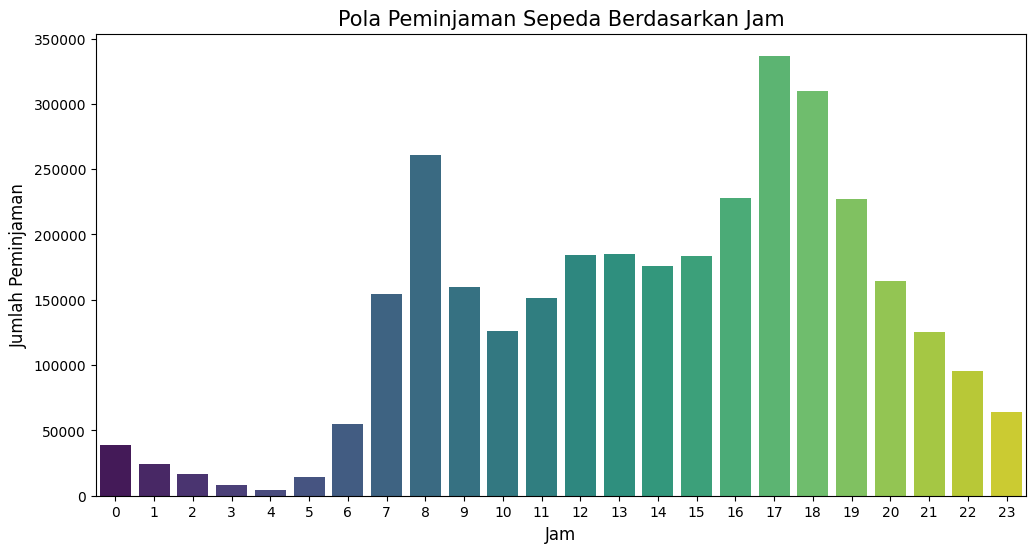

In [31]:
# Membuat plot menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x=hour_df['hour'],
    y=hour_df['count_cr'],
    estimator=sum,
    ci=None,
    palette="viridis"
)

# Menambahkan judul dan label sumbu
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam", fontsize=15)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)

# Menampilkan plot
plt.show()


### Pertanyaan 2: Bagaimana perkembangan penggunaan sistem peminjaman sepeda selama dua tahun terakhir?

Analisis tren penggunaan sistem peminjaman sepeda selama tahun 2011 dan 2012 berdasarkan seberapa sering kegiatan peminjaman sepeda setiap bulannya. Tujuannya adalah untuk melihat apakah ada peningkatan atau penurunan dalam penggunaan sepeda dari waktu ke waktu, serta mengidentifikasi faktor-faktor yang mungkin mempengaruhinya.

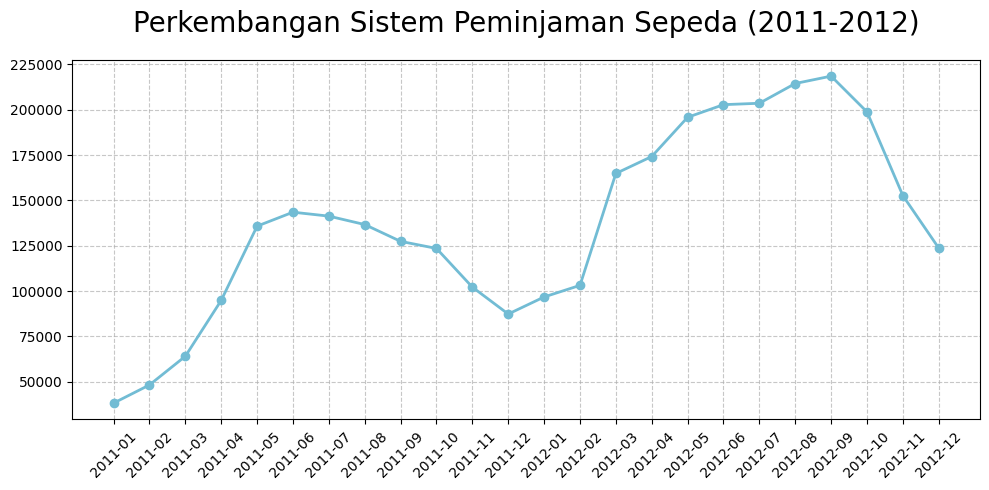

In [42]:
date_month_df = day_df.resample(rule='M', on='date').agg({
    "count_cr": "sum"
})
date_month_df.index = date_month_df.index.strftime('%Y-%m')  # Ubah indeks ke format tahun-bulan
date_month_df = date_month_df.reset_index()  # Reset indeks

plt.figure(figsize=(10, 5))
plt.plot(date_month_df["date"], date_month_df["count_cr"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Perkembangan Sistem Peminjaman Sepeda (2011-2012)", fontsize=20, pad=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Menampilkan grid dengan garis putus-putus
plt.tight_layout()  # Memastikan layout plot terlihat rapi
plt.show()


### Pertanyaan 3: Apakah ada perbedaan pola peminjaman sepeda antara hari-hari kerja dan akhir pekan?

Menganalisis perbedaan pola peminjaman sepeda antara hari-hari kerja dan akhir pekan berdasarkan data harian dan per jam. Tujuannya adalah untuk menentukan apakah terdapat perbedaan yang signifikan dalam tingkat peminjaman sepeda antara hari-hari kerja dan akhir pekan.

In [59]:
rent_workday = day_df.groupby(by='workingday').agg({
    "count_cr": ["sum", "mean"]
    }).sort_values(by=("count_cr", "sum"), ascending=False).reset_index()

rent_workday


workingday count_cr             
                  sum         mean
0        Yes  2292410  4584.820000
1         No  1000269  4330.168831

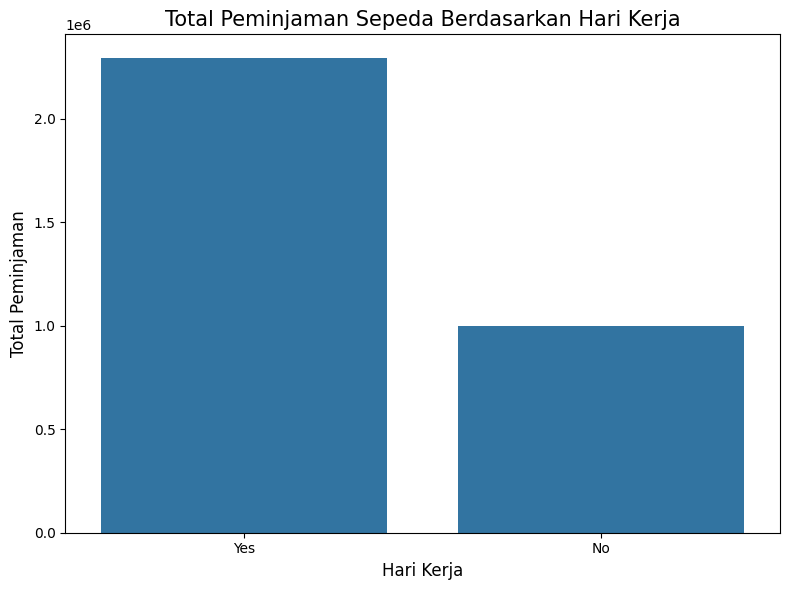

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=("workingday"), y=("count_cr", "sum"), data=rent_workday)

# Menambahkan judul dan label sumbu
plt.title("Total Peminjaman Sepeda Berdasarkan Hari Kerja", fontsize=15)
plt.xlabel("Hari Kerja", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)

# Menampilkan plot
plt.xticks(rotation=0)  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Mengatur layout plot agar rapih
plt.show()


### Pertanyaan 4: Pada musim apa tingkat peminjaman sepeda mencapai puncaknya?

Dengan pertanyaan ini, fokus ditetapkan pada mencari musim yang paling banyak menghasilkan peminjaman sepeda, sementara juga mempertimbangkan rentang waktu tertentu yang spesifik (tahun 2011 dan 2012). Hal ini akan membantu dalam memahami pola musiman dalam penggunaan sistem peminjaman sepeda.

In [44]:
by_season = day_df.groupby("season").count_cr.sum().sort_values(ascending=False).reset_index()
by_season

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


<ipython-input-47-90cbcbff6e39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


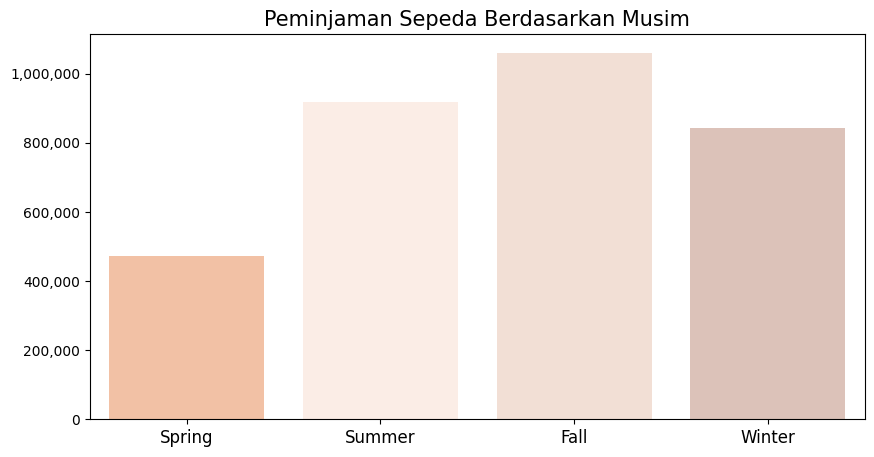

In [47]:
colors = ['#FFBE98', '#FEECE2', '#F7DED0', '#E2BFB3']

# Membuat plot dengan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(
    y="count_cr",
    x="season",
    data=by_season.sort_values(by="count_cr", ascending=False),
    palette=colors
)

# Menambahkan judul dan label sumbu
plt.title("Peminjaman Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menampilkan plot
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Dari hasil analisa didapatkan hasil bahwa bahwa peminjaman sepeda paling banyak pada jam 17:00 dan paling rendah pada jam 04:00

- Conclution pertanyaan 2:
Terjadi penurunan penggunaan sistem peminjaman sepeda dari tahun 2011 ke 2012. Fluktuasi musiman yang signifikan juga terlihat, dengan puncak penggunaan di musim panas dan terendah di musim dingin. Faktor-faktor yang mungkin memengaruhi tren ini termasuk musim, harga, ketersediaan infrastruktur bersepeda, dan faktor lain seperti acara publik, promosi, dan tren gaya hidup.

- Conclution pertanyaan 3:
Terdapat perbedaan yang signifikan dalam tingkat peminjaman sepeda antara hari kerja dan akhir pekan. Pada hari kerja tingkat peminjaman lebih tinggi dengan puncak peminjaman terjadi pada jam 08:00-09:00 dan 17:00-18:00

- Conclution pertanyaan 4:
Terdapat pola musiman yang jelas dalam penggunaan sistem peminjaman sepeda.
Puncak penggunaan terjadi di musim panas (Juni-Agustus).
Penurunan penggunaan terjadi di musim dingin (Desember-Februari).
